In [3]:
import os

os.chdir("/home/guido/github/physioex-private/")

In [29]:
from physioex.data import PhysioExDataset

data = PhysioExDataset(
    datasets=["hmc"],  # you can read different datasets merged together in this way
    preprocessing="raw",
    selected_channels=["EEG", "EOG", "EMG"],
    data_folder="/mnt/guido-data/",
)

# you can now access any sequence of epochs in the dataset
signal, label = data[100]

signal.shape  # will be [21 (default sequence lenght), 3, 3000]
label.shape  # will be [21]

torch.Size([21])

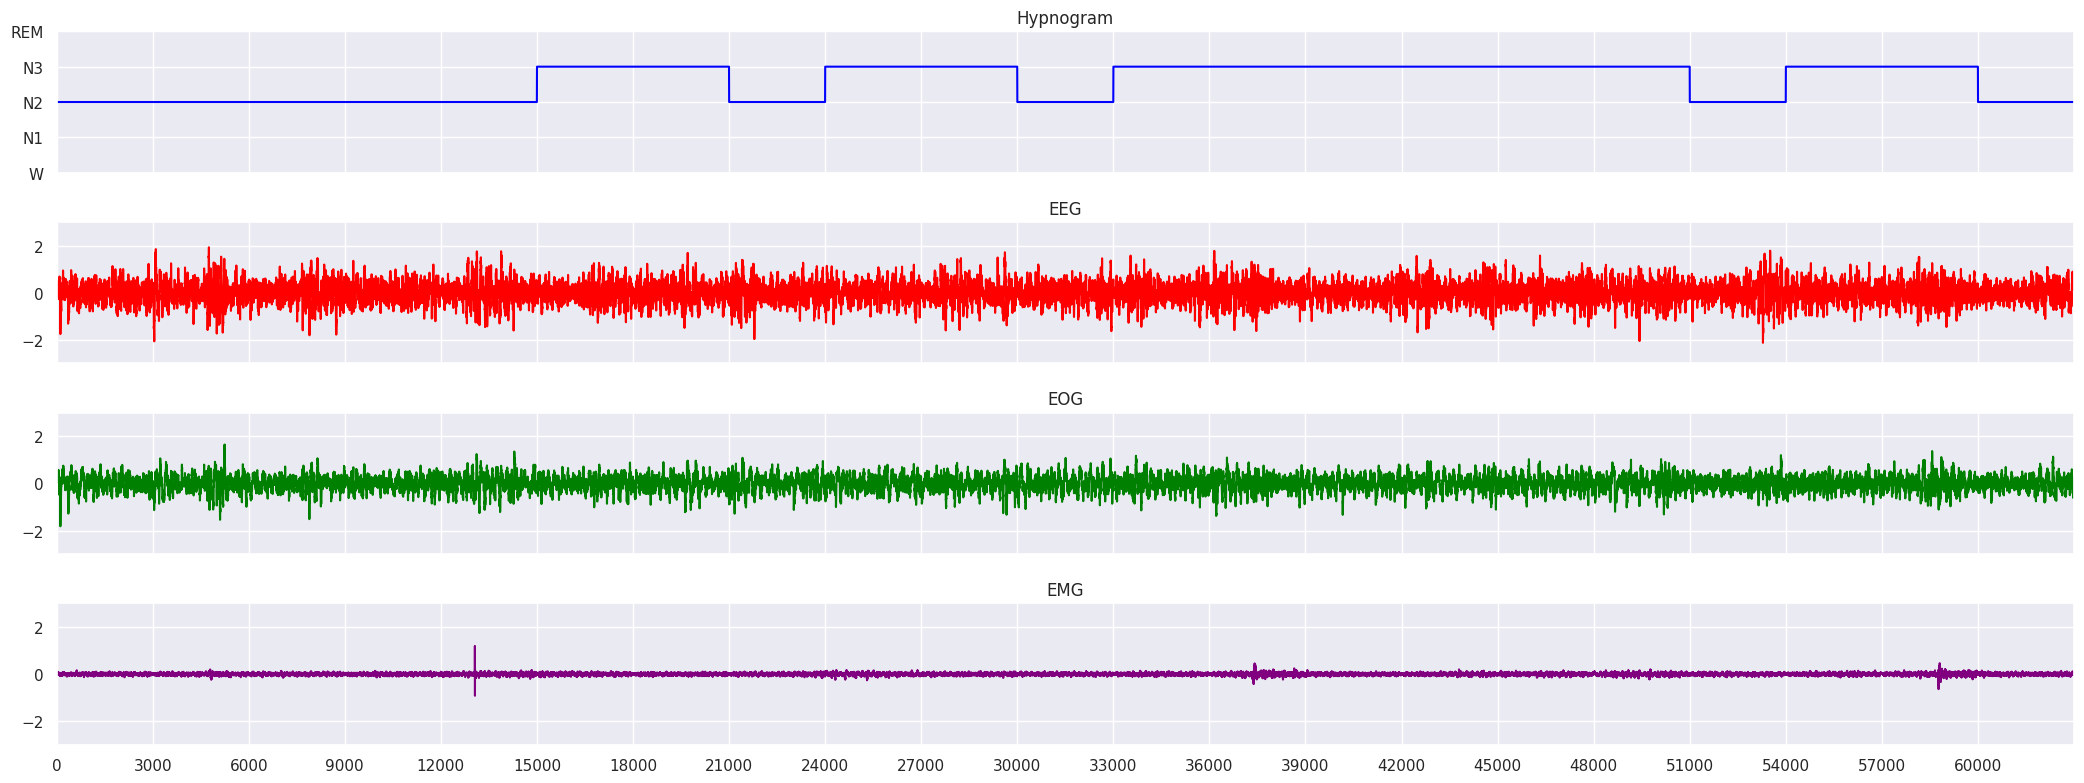

In [31]:
# plot the signal sequence and the hypnogram with seaborn
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.signal import resample
import numpy as np

sns.set(style="darkgrid")

hypnogram = np.ones((21, 3000)) * label.numpy().reshape(-1, 1)

# plot a subfigure with one column for each element of the sequence (21)
fig, ax = plt.subplots(4, 1, figsize=(21, 8), sharex="col", sharey="row")

hypnogram = hypnogram.reshape(-1)
signals = signal.numpy().transpose(1, 0, 2).reshape(3, -1)

# set tytle for each subplot
sns.lineplot(x=range(3000 * 21), y=hypnogram, ax=ax[0], color="blue")
# then the channels:
sns.lineplot(x=range(3000 * 21), y=signals[0], ax=ax[1], color="red")
sns.lineplot(x=range(3000 * 21), y=signals[1], ax=ax[2], color="green")
sns.lineplot(x=range(3000 * 21), y=signals[2], ax=ax[3], color="purple")

ax[0].set_title("Hypnogram")
ax[1].set_title("EEG")
ax[2].set_title("EOG")
ax[3].set_title("EMG")

ax[0].set_ylim([0, 4])
ax[0].set_yticks(range(0, 5))
ax[0].set_yticklabels(["W", "N1", "N2", "N3", "REM"])
# set the same y for all channels subplots
ax[1].set_ylim([-3, 3])
ax[2].set_ylim([-3, 3])
ax[3].set_ylim([-3, 3])

ax[0].set_xlim([0, 3000 * 21])
ax[0].set_xticks(range(0, 3000 * 21, 3000))

plt.tight_layout()